In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
d1=pd.read_csv("Steel_industry_data.csv")
d1

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [14]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
d1.iloc[:,[8,9,10]]=d1.iloc[:,[8,9,10]].apply(LabelEncoder().fit_transform)

d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  int32  
 9   Day_of_week                           35040 non-null  int32  
 10  Load_Type                             35040 non-null  int32  
dtypes: float64(6), 

<AxesSubplot:>

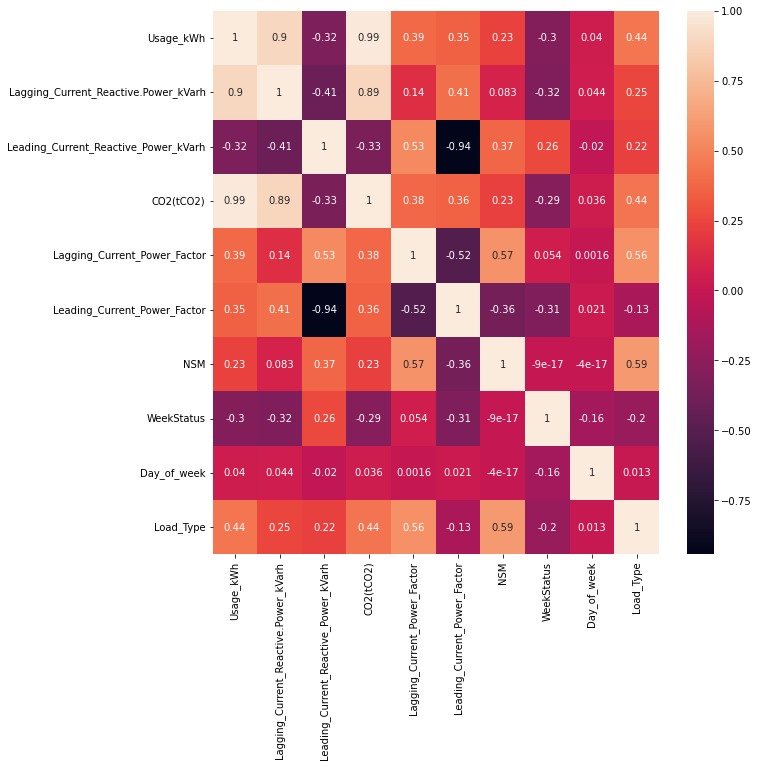

In [15]:
data=d1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data,annot=True)

In [ ]:
sns.pairplot(d1, size=2.5)

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
X=d1.iloc[:,[2,6,10]]
y=d1.iloc[:,1]
X

In [ ]:
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1, random_state = 0)
X_train

In [ ]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform
X_train

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=10, random_state=42, criterion = 'mse')


RFregressor.fit(X_train,y_train) # training



prediction = RFregressor.predict(X_test)# testing 


print(prediction)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("mean absolute error is:",mean_absolute_error(y_test,prediction))


In [ ]:
plt.scatter(y_test,prediction)
plt.show()